In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import shutil
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os
import random
from keras.preprocessing.image import ImageDataGenerator

In [3]:
df = pd.read_csv('train_new.csv')
df.head()

,image,class
0,a lot8744_frame0.jpg,a lot
1,a lot8744_frame1.jpg,a lot
2,a lot8745_frame0.jpg,a lot
3,a lot8745_frame1.jpg,a lot
4,a lot8745_frame2.jpg,a lot


In [4]:
top = df['class'].value_counts()
ds= pd.DataFrame(top[:20])
ds

,class
cousin,47
thin,45
go,40
computer,39
drink,39
interest,39
cool,39
thanksgiving,38
short,38
shirt,38


In [5]:
import cv2
labels = list(ds.index)
labels

['cousin',
 'thin',
 'go',
 'computer',
 'drink',
 'interest',
 'cool',
 'thanksgiving',
 'short',
 'shirt',
 'later',
 'who',
 'trade',
 'apple',
 'before',
 'tall',
 'accident',
 'appointment',
 'man',
 'help']

In [9]:
import tensorflow as tf
tf.keras.preprocessing.image_dataset_from_directory(
    'D:\GAIP\Project\train_small/',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'D:\\GAIP\\Project\train_small/'

In [10]:
ds['sign'] = list(ds.index)
ds

,class,sign
cousin,47,cousin
thin,45,thin
go,40,go
computer,39,computer
drink,39,drink
interest,39,interest
cool,39,cool
thanksgiving,38,thanksgiving
short,38,short
shirt,38,shirt


In [12]:
ds.index = pd.to_numeric(ds.index, errors='coerce')
#ds.set_index()
ds

,class,sign
NaN,47,cousin
NaN,45,thin
NaN,40,go
NaN,39,computer
NaN,39,drink
NaN,39,interest
NaN,39,cool
NaN,38,thanksgiving
NaN,38,short
NaN,38,shirt


In [13]:
labels_dict = dict(zip(range(0,20),ds.sign))
labels_dict

{0: 'cousin',
 1: 'thin',
 2: 'go',
 3: 'computer',
 4: 'drink',
 5: 'interest',
 6: 'cool',
 7: 'thanksgiving',
 8: 'short',
 9: 'shirt',
 10: 'later',
 11: 'who',
 12: 'trade',
 13: 'apple',
 14: 'before',
 15: 'tall',
 16: 'accident',
 17: 'appointment',
 18: 'man',
 19: 'help'}

In [39]:
len(labels_dict.values())

20

In [20]:
import pathlib
path = 'D:\GAIP/Project/train_small/'
sign_images_dict = {}
len_classes = os.listdir(path)
path1 = pathlib.Path(path)
for img in range(len(len_classes)):
    sign_images_dict[img] = list(path1.glob(str(labels_dict[img])+'/*'))
sign_images_dict[0][0]

WindowsPath('D:/GAIP/Project/train_small/cousin/cousin105_frame0.jpg')

In [21]:
import numpy as np
x,y=[],[]
for sign_label,images in sign_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(sign_label)
x = np.array(x)
y = np.array(y)
x[0]

array([[[40, 44,  9],
        [40, 44,  9],
        [40, 44,  9],
        ...,
        [45, 51, 10],
        [45, 51, 10],
        [44, 50,  9]],

       [[40, 44,  9],
        [40, 44,  9],
        [40, 44,  9],
        ...,
        [45, 51, 10],
        [45, 51, 10],
        [44, 50,  9]],

       [[40, 44,  9],
        [40, 44,  9],
        [40, 44,  9],
        ...,
        [45, 51, 10],
        [45, 51, 10],
        [44, 50,  9]],

       ...,

       [[46, 50,  9],
        [47, 50, 11],
        [48, 52, 10],
        ...,
        [56, 62, 13],
        [56, 62, 13],
        [54, 60, 13]],

       [[46, 50,  9],
        [47, 50, 11],
        [48, 52, 11],
        ...,
        [56, 62, 13],
        [56, 62, 13],
        [54, 60, 13]],

       [[46, 49, 10],
        [47, 50, 11],
        [48, 51, 11],
        ...,
        [60, 65, 16],
        [59, 62, 16],
        [58, 61, 15]]], dtype=uint8)

In [22]:
x.shape

(733, 224, 224, 3)

In [25]:
y[0]

0

In [31]:
x = x/255.0
x[0]

array([[[0.15686275, 0.17254902, 0.03529412],
        [0.15686275, 0.17254902, 0.03529412],
        [0.15686275, 0.17254902, 0.03529412],
        ...,
        [0.17647059, 0.2       , 0.03921569],
        [0.17647059, 0.2       , 0.03921569],
        [0.17254902, 0.19607843, 0.03529412]],

       [[0.15686275, 0.17254902, 0.03529412],
        [0.15686275, 0.17254902, 0.03529412],
        [0.15686275, 0.17254902, 0.03529412],
        ...,
        [0.17647059, 0.2       , 0.03921569],
        [0.17647059, 0.2       , 0.03921569],
        [0.17254902, 0.19607843, 0.03529412]],

       [[0.15686275, 0.17254902, 0.03529412],
        [0.15686275, 0.17254902, 0.03529412],
        [0.15686275, 0.17254902, 0.03529412],
        ...,
        [0.17647059, 0.2       , 0.03921569],
        [0.17647059, 0.2       , 0.03921569],
        [0.17254902, 0.19607843, 0.03529412]],

       ...,

       [[0.18039216, 0.19607843, 0.03529412],
        [0.18431373, 0.19607843, 0.04313725],
        [0.18823529, 0

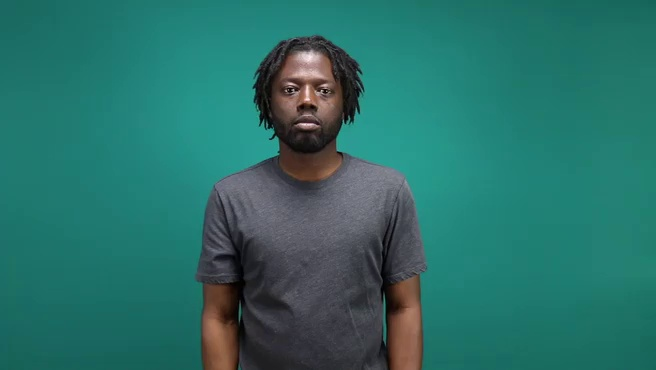

In [29]:
import PIL
PIL.Image.open(str(sign_images_dict[1][19]))

In [33]:
from sklearn.model_selection import train_test_split

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(x, y,test_size=0.25)

In [37]:
trainY

array([ 7,  9, 13,  6, 17, 11,  6, 17,  7, 12,  1,  6, 15, 16, 16,  3,  2,
        9,  5,  0,  3,  4, 12, 10, 15,  3,  9,  1,  7, 17,  4,  1,  0,  3,
        1,  7, 18, 18,  2,  9,  4, 17, 17,  6, 15, 10,  0,  0,  6,  3, 13,
       15,  0, 16,  2,  1, 13, 12,  3,  8, 11, 12,  7, 15,  5,  2, 11, 18,
       18,  4, 11, 14,  9,  8,  0,  7, 16,  4,  3,  8,  9, 15,  2,  4,  7,
        6, 17,  6,  0, 17,  8, 11,  6, 12,  1, 17, 16,  3, 13,  0,  1,  1,
        5, 17, 13, 17, 12,  1,  8,  0,  3,  4, 14,  1, 17, 17, 13,  8,  1,
        6,  9, 18, 13,  9,  2,  4,  4,  6, 15,  4, 13,  7,  9, 15, 15,  8,
       16,  3,  7,  2,  9, 12,  8, 14,  9,  4,  0, 17,  0,  0,  2,  1, 14,
        3, 15,  9,  4, 10,  6,  9,  8, 14,  6,  1, 13,  7, 18, 13, 12,  2,
        2, 11,  6, 18, 13,  5,  1,  8, 18, 14,  2,  3,  9,  0,  0, 16, 14,
        1, 10,  3, 11, 10, 18,  3, 12,  7, 18,  1, 10, 14,  6,  1,  7, 11,
        8, 15, 10, 18,  2,  1,  2,  2, 13,  0, 10,  5, 10, 14,  9,  5, 18,
       11,  9, 17, 12,  8

In [36]:
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
datagen.fit(trainX)
batches=datagen.flow(trainX,trainY,batch_size=20)
#train_generator = image_data_generator.flow_from_directory(directory, batch_size=32, class_mode='categorical', target_size=(299,299), subset=None, seed=None)    
x_batch,y_batch=next(batches)

In [46]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.layers import AveragePooling2D
baseModel = ResNet50(weights="imagenet", include_top=False,input_tensor=layers.Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(len(labels_dict.values()), activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
    opt = SGD(lr=1e-4, momentum=0.9, decay=1e-4 / 200)
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
    print("[INFO] training head...")
H = model.fit(x=trainX, trainY, batch_size=batches,steps_per_epoch=len(trainX)//32, validation_data=datagen.flow(testX, testY),validation_steps=len(testX) // 32,epochs=200)

SyntaxError: positional argument follows keyword argument (<ipython-input-46-b1be622ea154>, line 23)